# LDA in 2D and 3D
## And comparison with higher dimensions

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
digits=[2,4,7]

In [85]:
def trainTestSets(X, Y, perc,N):
    trainSize=int(perc*N/100)
    Xtrain=X[:,:trainSize]
    Ytrain=Y[:trainSize]
    Xtest=X[:,trainSize:N]
    Ytest=Y[trainSize:N]
    return Xtrain, Ytrain, Xtest, Ytest

data=pd.read_csv("data.csv")
data=np.array(data)
np.random.shuffle(data)
X=data[:,1:].T 
Y=data[:,0]

i1= (Y==digits[0])
i2= (Y==digits[1])
i3= (Y==digits[2])
X=X[:, i1+i2+i3]
Y=Y[i1+i2+i3]
d,N=X.shape

Xtrain, Ytrain, Xtest, Ytest = trainTestSets(X,Y,60,N)
i1= (Ytrain==digits[0])
i2= (Ytrain==digits[1])
i3= (Ytrain==digits[2])
X1=Xtrain[:, i1]
X2=Xtrain[:, i2]
X3=Xtrain[:, i3]

Y1=Ytrain[i1]
Y2=Ytrain[i2]
Y3=Ytrain[i3]


In [86]:
Xtrain=np.concatenate((X1,X2,X3), axis=1)
Ytrain=np.concatenate((Y1,Y2,Y3))

Text(0.5, 1.0, 'class centroid of digit 2')

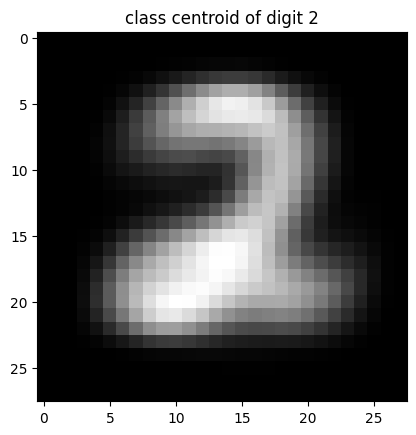

In [87]:
C=np.mean(Xtrain, axis=1)

C1=np.mean(X1, axis=1)
C2=np.mean(X2, axis=1)
C3=np.mean(X3, axis=1)

plt.imshow(np.reshape(C1,(28,28)), cmap="gray") 
plt.title("class centroid of digit "+ str(digits[0]))

In [88]:
d=784
X1c=X1-C1.reshape((d,1))
X2c=X2-C2.reshape((d,1))
X3c=X3-C3.reshape((d,1))

Xw=np.concatenate((X1c, X2c, X3c), axis=1)
Sw= Xw@Xw.T 

Xbar1= np.repeat(C1.reshape(d,1), X1.shape[1], axis=1)
Xbar2= np.repeat(C2.reshape(d,1), X2.shape[1], axis=1)
Xbar3= np.repeat(C3.reshape(d,1), X3.shape[1], axis=1)

Xbar=np.concatenate((Xbar1, Xbar2, Xbar3), axis=1)
Xbarc=Xbar-C.reshape((d,1)) 

Sb=Xbarc @ Xbarc.T 


In [89]:
try:
    L=np.linalg.cholesky(Sw)
except:
    epsilon=1e-6
    Sw=Sw+(epsilon*np.eye(Sw.shape[0]))
    L=np.linalg.cholesky(Sw)


In [90]:
import scipy.sparse.linalg as sp

Q_vect=[]
for k in range(2,30):
    tmp=np.linalg.inv(L)@Sb@L
    v,W=sp.eigs(tmp, k=k)
    W=np.real(W)
    Q_vect.append(np.linalg.inv(L.T)@W)


2D plot

(2, 1)


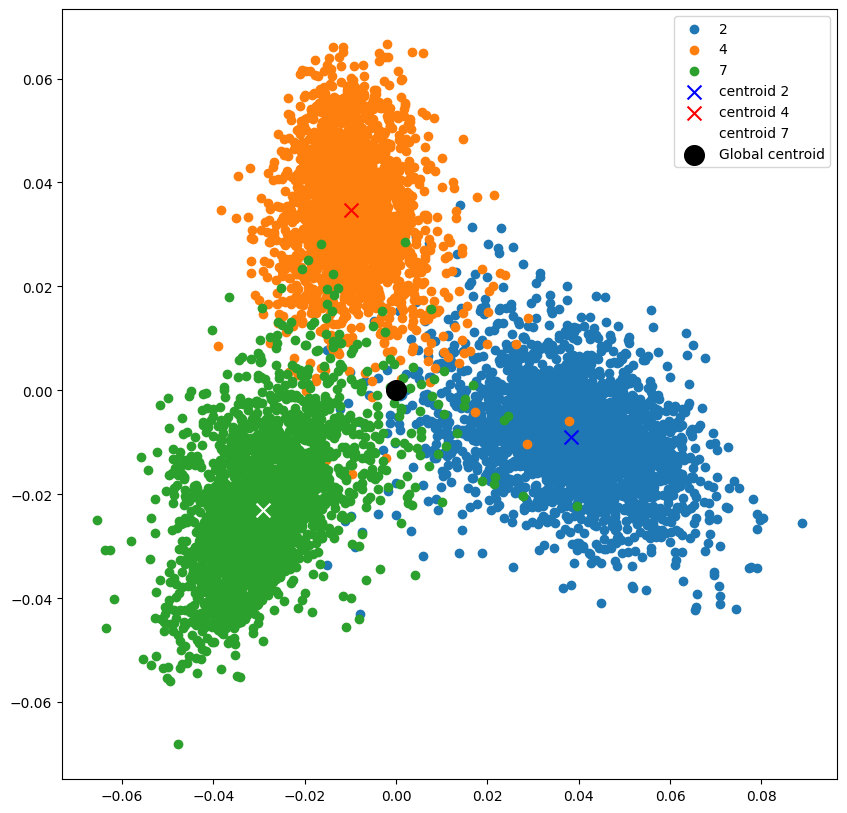

In [91]:
k=2
Xc=Xtrain-C.reshape((d,1))
Z=np.array(Q_vect[0]).T@Xc

Z1=Z[:,Ytrain==digits[0]]
Z2=Z[:,Ytrain== digits[1]]
Z3=Z[:,Ytrain== digits[2]]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Z1[0,:], Z1[1,:], label=digits[0]) 
ax.scatter(Z2[0,:], Z2[1,:], label=digits[1]) 
ax.scatter(Z3[0,:], Z3[1,:], label=digits[2]) 

C1z=np.mean(Z1, axis=1).reshape(k,1)
C2z=np.mean(Z2, axis=1).reshape(k,1)
C3z=np.mean(Z3, axis=1).reshape(k,1)
Cz=np.mean(Z, axis=1).reshape(k,1)
print(C1z.shape)

ax.scatter(C1z[0], C1z[1], marker='x', color='blue', s=100, label='centroid '+str(digits[0]))
ax.scatter(C2z[0], C2z[1], marker='x', color='red', s=100, label='centroid '+str(digits[1]))
ax.scatter(C3z[0], C3z[1], marker='x', color='white', s=100, label='centroid '+str(digits[2]))
ax.scatter(Cz[0], Cz[1], c="black",s=200, marker="o", label="Global centroid")
plt.legend()
plt.show()

3D plot 

(3, 1)


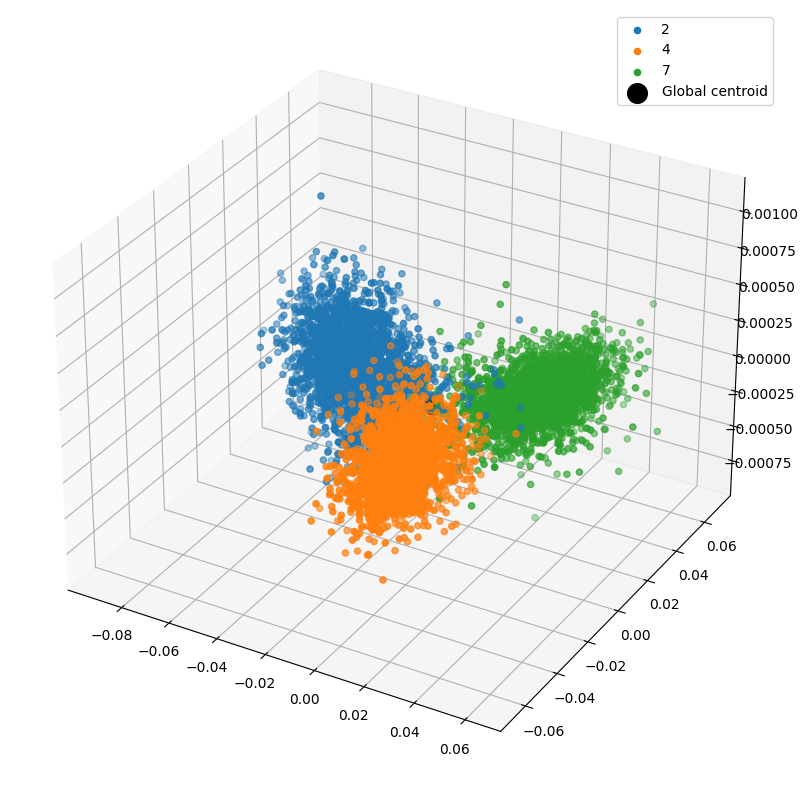

In [92]:
k=3
Z=np.array(Q_vect[1]).T@Xtrain

Z1=Z[:,Ytrain==digits[0]]
Z2=Z[:,Ytrain== digits[1]]
Z3=Z[:,Ytrain== digits[2]]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z1[0,:], Z1[1,:], Z1[2,:], label=digits[0]) 
ax.scatter(Z2[0,:], Z2[1,:], Z2[2,:], label=digits[1]) 
ax.scatter(Z3[0,:], Z3[1,:], Z3[2,:], label=digits[2]) 

C1z=np.mean(Z1, axis=1).reshape(k,1)
C2z=np.mean(Z2, axis=1).reshape(k,1)
C3z=np.mean(Z3, axis=1).reshape(k,1)
Cz=np.mean(Z, axis=1).reshape(k,1)
print(C1z.shape)

ax.scatter(Cz[0], Cz[1], Cz[2], c="black",s=200, marker="o", label="Global centroid")
plt.legend()
plt.show()

3D average distance from centroid

In [93]:
D1=[]
for i in range(Z1.shape[1]):
    D1.append(np.linalg.norm(Z1[:,i]-C1z,2)**2)
print(f"average distance form C1: {np.mean(D1)}")

D2=0
for i in range(Z2.shape[1]):
    D2+=np.linalg.norm(Z2[:,i]-C2z, 2)**2
D2=D2/Z2.shape[1]
print(f"average distance form C2: {D2}")

D3=0
for i in range(Z3.shape[1]):
    D3+=np.linalg.norm(Z3[:,i]-C3z, 2)**2
D3=D3/Z3.shape[1]
print(f"average distance form C3: {D3}")

average distance form C1: 0.006465769792994599
average distance form C2: 0.004171037961707109
average distance form C3: 0.0024352665543656


Accuracy of test set with k=3

In [94]:
def min(vec):
    min=100000000
    ind=0
    minIndx=0
    for i in vec:
        if i<=min:
            min=i
            minIndx=ind
        ind+=1
    return minIndx

def accuracy(Ypredict, Ytest):
    sum=0
    i=0
    for y in Ypredict:
        if(y==Ytest[i]):
            sum+=1
        i+=1
    return (sum/Ytest.shape[0], sum)


Ztest=np.array(Q_vect[0]).T@Xtest
testSize=Ztest.shape[1]
Ypredict=[]
for i in range(testSize):
    D1=np.linalg.norm(Ztest[:,i]-C1z,2)**2
    D2=np.linalg.norm(Ztest[:,i]-C2z,2)**2
    D3=np.linalg.norm(Ztest[:,i]-C3z,2)**2

    minInd=min([D1,D2,D3])  
    if(minInd==0):
        Ypredict.append(digits[0])
    elif(minInd==1):
        Ypredict.append(digits[1])
    else:
        Ypredict.append(digits[2])

acc, matches=accuracy(Ypredict, Ytest)
print(f"total datapoints: {testSize}, matches: {matches}")
print(f"prediction accuracy = {accuracy}")

total datapoints: 5060, matches: 166
prediction accuracy = <function accuracy at 0x000002CD8FE65440>


Accuracy of test set for increasing k

In [95]:
Xc=Xtrain-C.reshape((d,1))
accuraciesTest=[]
accuraciesTrain=[]
for k in range(0,28):
    Ztest=np.array(Q_vect[k]).T@Xtest
    Z=np.array(Q_vect[k]).T@Xc
    Z1=Z[:,Ytrain==digits[0]]
    Z2=Z[:,Ytrain== digits[1]]
    Z3=Z[:,Ytrain== digits[2]]
    C1z=np.mean(Z1, axis=1).reshape(k+2,1)
    C2z=np.mean(Z2, axis=1).reshape(k+2,1)
    C3z=np.mean(Z3, axis=1).reshape(k+2,1)
    
    #testset accuracy
    Ypredict=[]
    for i in range(testSize):
        D1=np.linalg.norm(Ztest[:,i]-C1z,2)**2
        D2=np.linalg.norm(Ztest[:,i]-C2z,2)**2
        D3=np.linalg.norm(Ztest[:,i]-C3z,2)**2

        minI=min([D1,D2,D3])  
        if(minI==0):
            Ypredict.append(digits[0])
        elif(minI==1):
            Ypredict.append(digits[1])
        else:
            Ypredict.append(digits[2])

    accTest, match=accuracy(Ypredict, Ytest)
    accuraciesTest.append(accTest)

    #trainset accuracy
    Ypredict=[]
    for i in range(Z.shape[1]):
        D1=np.linalg.norm(Z[:,i]-C1z,2)**2
        D2=np.linalg.norm(Z[:,i]-C2z,2)**2
        D3=np.linalg.norm(Z[:,i]-C3z,2)**2

        minI=min([D1,D2,D3])  
        if(minI==0):
            Ypredict.append(digits[0])
        elif(minI==1):
            Ypredict.append(digits[1])
        else:
            Ypredict.append(digits[2])
    accTrain, match=accuracy(Ypredict, Ytrain)
    accuraciesTrain.append(accTrain)


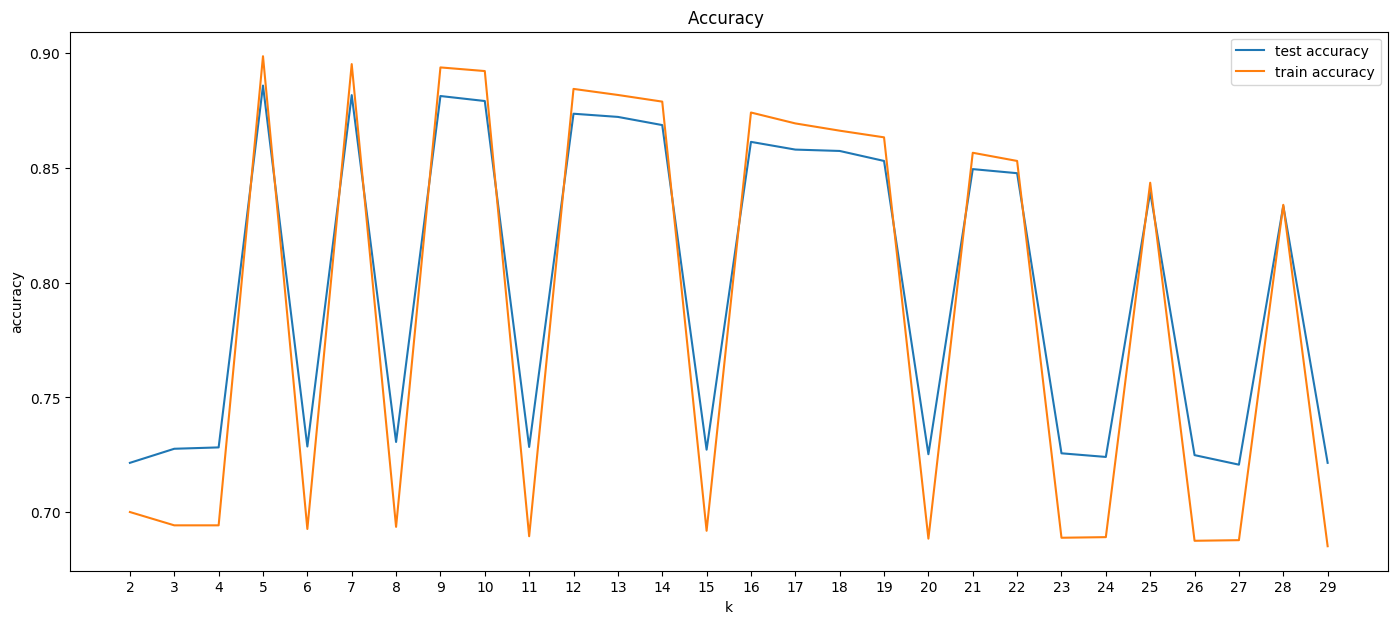

In [96]:

plt.figure(figsize=(17,7))
plt.plot(range(2,30), accuraciesTest, label="test accuracy")
plt.plot(range(2,30), accuraciesTrain, label="train accuracy")

plt.title("Accuracy ")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks(range(2,30))
plt.legend()

